# Assignment 14 (Decision Trees) Q2) Fraud Check

## Q2. Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

## Data Description :

## Undergrad : person is under graduated or not
## Marital.Status : marital status of a person
## Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
## Work Experience : Work experience of an individual person
## Urban : Whether that person belongs to urban area or not

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn import externals
from io import StringIO
import pydotplus
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import accuracy_score
import matplotlib.image as mpimg 
from sklearn.tree import export_graphviz

## Data collection and description 

In [2]:
# Loading Dataset
fraud_check_df = pd.read_csv("Fraud_check.csv")

In [3]:
fraud_check_df1 = fraud_check_df.copy()

In [4]:
fraud_check_df1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
# Summary Statistics
fraud_check_df1.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
# Checking for null values
fraud_check_df1.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
# Checking DataTypes 
fraud_check_df1.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

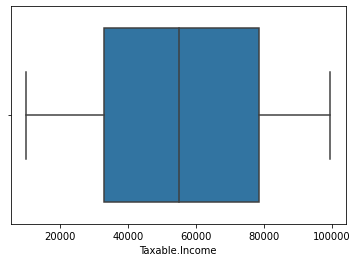

In [8]:
# Checking for Outliers
ax = sns.boxplot(fraud_check_df1['Taxable.Income'])

## There are no outliers in the data

In [9]:
plt.rcParams["figure.figsize"] = 9,5

Skewness: 0.030014788906377175
Kurtosis: -1.1997824607083138


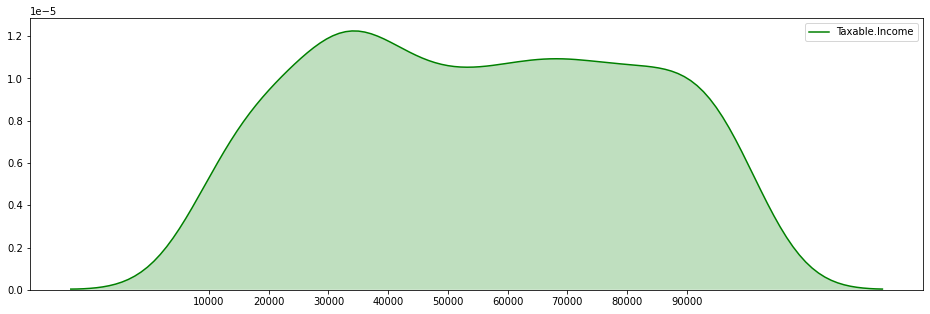

In [10]:
plt.figure(figsize=(16,5))
print("Skewness: {}".format(fraud_check_df1['Taxable.Income'].skew()))
print("Kurtosis: {}".format(fraud_check_df1['Taxable.Income'].kurtosis()))
ax = sns.kdeplot(fraud_check_df1['Taxable.Income'],shade=True,color='g')
plt.xticks([i for i in range(10000,100000,10000)])
plt.show()

## The Data is Skewed on the Right
## The Data has Negative Kurtosis

In [11]:
obj_column = fraud_check_df1.select_dtypes(include='object').columns.tolist()

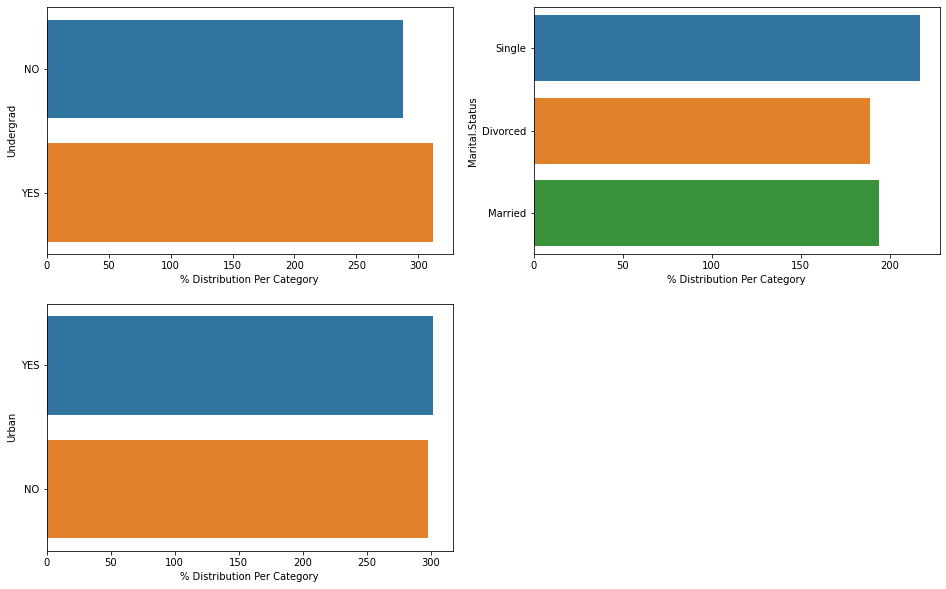

In [12]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_column,1):
    plt.subplot(2,2,i)
    sns.countplot(data=fraud_check_df1,y=col)
    plt.ylabel(col)
    plt.xlabel('% Distribution Per Category')
plt.show()

## From above graphs we can say that there is more distribution per category for 'Undergrad' which says YES. Most of the distribution per category in marital.status is Single. There are almost equal number of urban and non-urban values from the 'Urban' column.

In [13]:
num_columns = fraud_check_df1.select_dtypes(exclude='object').columns.tolist()

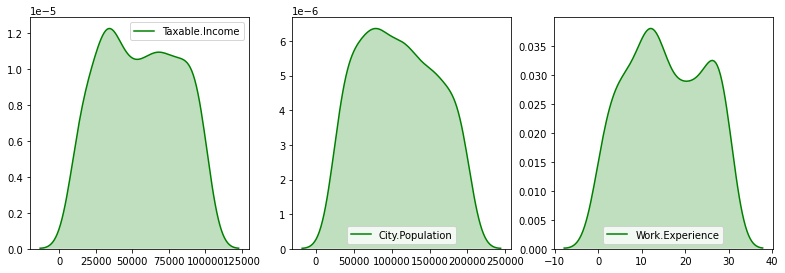

,Taxable.Income,City.Population,Work.Experience
Skewness,0.030015,0.125009,0.018529
Kurtosis,-1.199782,-1.120154,-1.167524


In [14]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(fraud_check_df[col],color='g',shade=True)
plt.show()
num_data = fraud_check_df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['Skewness','Kurtosis'])

## All the columns, that is Taxable.Income, City.Population, Work.Experience have negative kurtosis.  

In [15]:
fraud_check_df1 = pd.get_dummies(fraud_check_df1, columns = ['Undergrad','Marital.Status','Urban'])

## Correlation Analysis

<AxesSubplot:>

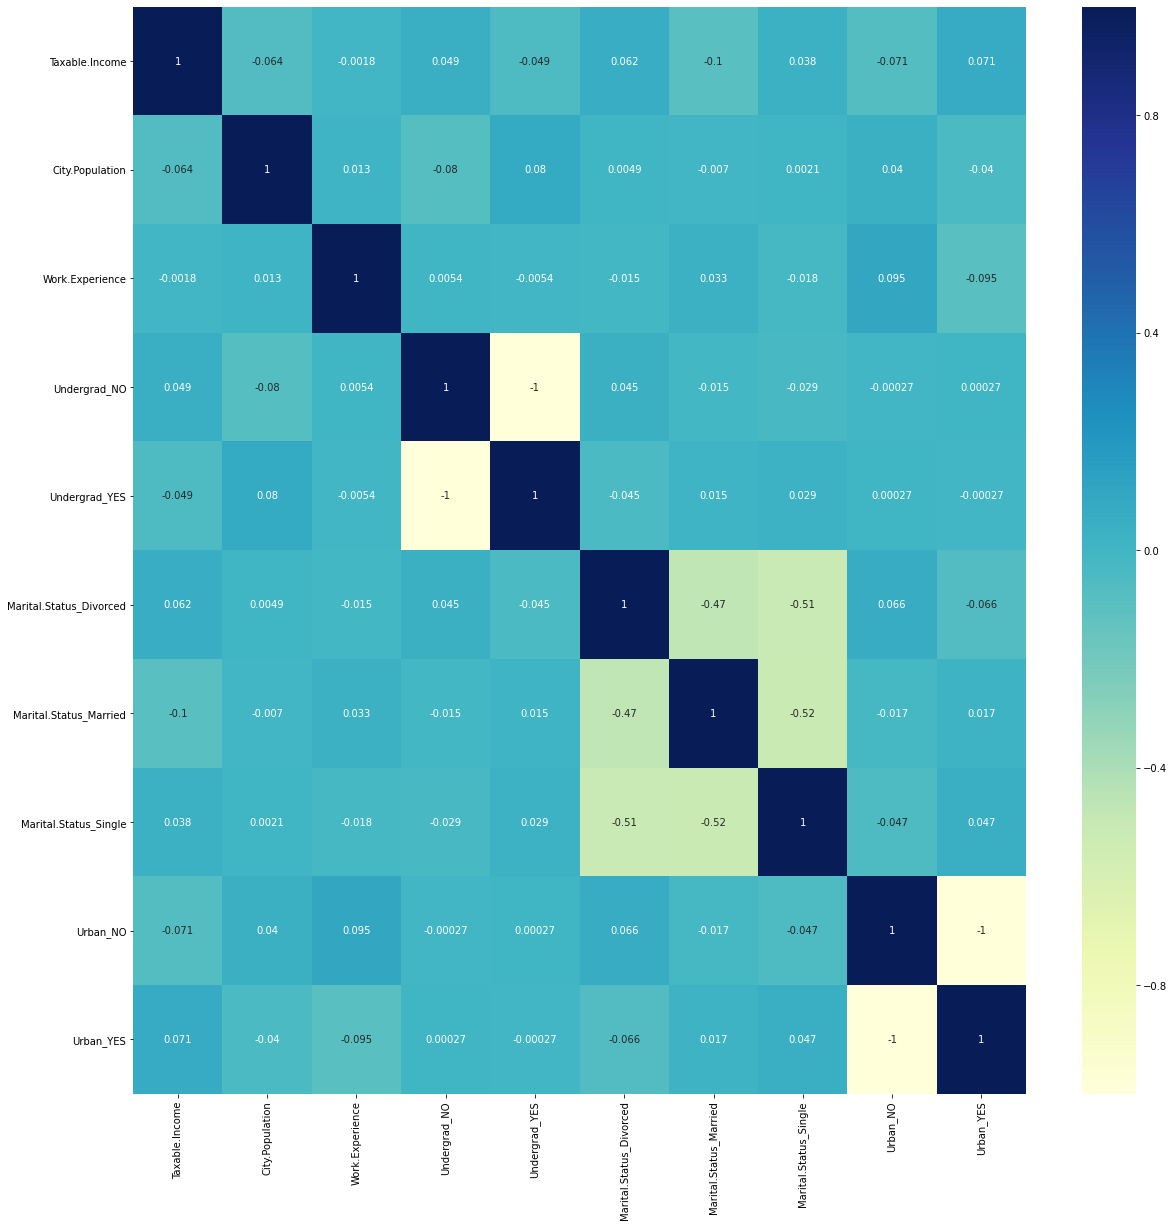

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(fraud_check_df1.corr(),cmap='YlGnBu',annot=True)

## Decision Tree
## Since the target variable is continious, we create a class of taxable_income <= 30000 as "Risky" and others are "Good"

In [17]:
fraud_check_df1['Taxable.Income']=pd.cut(fraud_check_df1['Taxable.Income'],bins=[0,30000,100000],labels=['Risky','Good'])

In [18]:
list(fraud_check_df1.columns)

['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES']

In [19]:
x = fraud_check_df1.iloc[:,1:10]
y = fraud_check_df1.iloc[:,0]

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [21]:
y_train.value_counts()

Good     389
Risky     91
Name: Taxable.Income, dtype: int64

In [22]:
# Building Decision Tree Model
model = DT(criterion='entropy') 
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [23]:
pred_train = model.predict(x_train)

In [24]:
pred_train

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Risky', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Risky', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'G

In [25]:
accuracy_score(y_train,pred_train)

1.0

In [26]:
confusion_matrix(y_train,pred_train)

array([[389,   0],
       [  0,  91]], dtype=int64)

In [27]:
pred_test = model.predict(x_test)

In [28]:
accuracy_score(y_test,pred_test)

0.625

In [29]:
confusion_matrix(y_test,pred_test)

array([[66, 21],
       [24,  9]], dtype=int64)

In [30]:
fraud_check_df2=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})

In [31]:
fraud_check_df2

,Actual,Predicted
95,Good,Good
80,Good,Risky
247,Risky,Good
547,Good,Good
293,Good,Good
180,Good,Good
88,Good,Good
526,Risky,Good
9,Good,Good
284,Risky,Risky


In [32]:
cols = list(fraud_check_df1.columns)

In [33]:
predictors = cols[1:10]
target = cols[0]

In [34]:
dot_data = StringIO()

In [35]:
export_graphviz(model, out_file = dot_data ,filled = True,rounded =True,feature_names = predictors,class_names = target, impurity = False)

In [36]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [37]:
graph.write_png('Fraud_Check.png')

True

## Conclusion
## Since the accuracy of the Training set is 100% we test the accuracy on the test data which is 62%
## As seen in the confusion matrix of Test data 75 instances are predicted correctly and 45 instances are not

In [38]:
img = mpimg.imread('Fraud_Check.png')

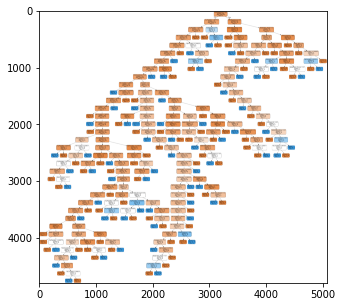

In [39]:
plt.imshow(img)

In [40]:
model.feature_importances_

array([0.66699385, 0.21710975, 0.01614434, 0.01068618, 0.0184824 ,
       0.02777399, 0.01968776, 0.01084037, 0.01228137])

In [41]:
fi = pd.DataFrame({'Feature': list(x_train.columns),
                   'Importance': model.feature_importances_}).\
                    sort_values('Importance', ascending = False)

In [42]:
fi

,Feature,Importance
0,City.Population,0.666994
1,Work.Experience,0.217110
5,Marital.Status_Married,0.027774
6,Marital.Status_Single,0.019688
4,Marital.Status_Divorced,0.018482
2,Undergrad_NO,0.016144
8,Urban_YES,0.012281
7,Urban_NO,0.010840
3,Undergrad_YES,0.010686


## As seen from above City.Population has more importance. 